In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import re
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

# DataSet 2016

In [2]:
a=pd.read_csv(r"E:\Python Data Science\Documents\csvs_per_year\csvs_per_year\madrid_2016.csv")
a

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2016-11-01 01:00:00,NaN,0.7,NaN,NaN,153.0,77.0,NaN,NaN,NaN,7.0,NaN,NaN,28079004
1,2016-11-01 01:00:00,3.1,1.1,2.0,0.53,260.0,144.0,4.0,46.0,24.0,18.0,2.44,14.4,28079008
2,2016-11-01 01:00:00,5.9,NaN,7.5,NaN,297.0,139.0,NaN,NaN,NaN,NaN,NaN,26.0,28079011
3,2016-11-01 01:00:00,NaN,1.0,NaN,NaN,154.0,113.0,2.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2016-11-01 01:00:00,NaN,NaN,NaN,NaN,275.0,127.0,2.0,NaN,NaN,18.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209491,2016-07-01 00:00:00,NaN,0.2,NaN,NaN,2.0,29.0,73.0,NaN,NaN,NaN,NaN,NaN,28079056
209492,2016-07-01 00:00:00,NaN,0.3,NaN,NaN,1.0,29.0,NaN,36.0,NaN,5.0,NaN,NaN,28079057
209493,2016-07-01 00:00:00,NaN,NaN,NaN,NaN,1.0,19.0,71.0,NaN,NaN,NaN,NaN,NaN,28079058
209494,2016-07-01 00:00:00,NaN,NaN,NaN,NaN,6.0,17.0,85.0,NaN,NaN,NaN,NaN,NaN,28079059


In [3]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209496 entries, 0 to 209495
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     209496 non-null  object 
 1   BEN      50755 non-null   float64
 2   CO       85999 non-null   float64
 3   EBE      50335 non-null   float64
 4   NMHC     25970 non-null   float64
 5   NO       208614 non-null  float64
 6   NO_2     208614 non-null  float64
 7   O_3      121197 non-null  float64
 8   PM10     102892 non-null  float64
 9   PM25     52165 non-null   float64
 10  SO_2     86023 non-null   float64
 11  TCH      25970 non-null   float64
 12  TOL      50662 non-null   float64
 13  station  209496 non-null  int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 22.4+ MB


In [4]:
b=a.iloc[:,1:14]
b

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,NaN,0.7,NaN,NaN,153.0,77.0,NaN,NaN,NaN,7.0,NaN,NaN,28079004
1,3.1,1.1,2.0,0.53,260.0,144.0,4.0,46.0,24.0,18.0,2.44,14.4,28079008
2,5.9,NaN,7.5,NaN,297.0,139.0,NaN,NaN,NaN,NaN,NaN,26.0,28079011
3,NaN,1.0,NaN,NaN,154.0,113.0,2.0,NaN,NaN,NaN,NaN,NaN,28079016
4,NaN,NaN,NaN,NaN,275.0,127.0,2.0,NaN,NaN,18.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209491,NaN,0.2,NaN,NaN,2.0,29.0,73.0,NaN,NaN,NaN,NaN,NaN,28079056
209492,NaN,0.3,NaN,NaN,1.0,29.0,NaN,36.0,NaN,5.0,NaN,NaN,28079057
209493,NaN,NaN,NaN,NaN,1.0,19.0,71.0,NaN,NaN,NaN,NaN,NaN,28079058
209494,NaN,NaN,NaN,NaN,6.0,17.0,85.0,NaN,NaN,NaN,NaN,NaN,28079059


In [5]:
c=b.fillna(value=10)
c

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,10.0,0.7,10.0,10.00,153.0,77.0,10.0,10.0,10.0,7.0,10.00,10.0,28079004
1,3.1,1.1,2.0,0.53,260.0,144.0,4.0,46.0,24.0,18.0,2.44,14.4,28079008
2,5.9,10.0,7.5,10.00,297.0,139.0,10.0,10.0,10.0,10.0,10.00,26.0,28079011
3,10.0,1.0,10.0,10.00,154.0,113.0,2.0,10.0,10.0,10.0,10.00,10.0,28079016
4,10.0,10.0,10.0,10.00,275.0,127.0,2.0,10.0,10.0,18.0,10.00,10.0,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209491,10.0,0.2,10.0,10.00,2.0,29.0,73.0,10.0,10.0,10.0,10.00,10.0,28079056
209492,10.0,0.3,10.0,10.00,1.0,29.0,10.0,36.0,10.0,5.0,10.00,10.0,28079057
209493,10.0,10.0,10.0,10.00,1.0,19.0,71.0,10.0,10.0,10.0,10.00,10.0,28079058
209494,10.0,10.0,10.0,10.00,6.0,17.0,85.0,10.0,10.0,10.0,10.00,10.0,28079059


In [6]:
d=c.head(10000)
d

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,10.0,0.7,10.0,10.00,153.0,77.0,10.0,10.0,10.0,7.0,10.00,10.0,28079004
1,3.1,1.1,2.0,0.53,260.0,144.0,4.0,46.0,24.0,18.0,2.44,14.4,28079008
2,5.9,10.0,7.5,10.00,297.0,139.0,10.0,10.0,10.0,10.0,10.00,26.0,28079011
3,10.0,1.0,10.0,10.00,154.0,113.0,2.0,10.0,10.0,10.0,10.00,10.0,28079016
4,10.0,10.0,10.0,10.00,275.0,127.0,2.0,10.0,10.0,18.0,10.00,10.0,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,1.6,10.0,10.00,372.0,105.0,5.0,10.0,10.0,10.0,10.00,10.0,28079039
9996,10.0,10.0,10.0,10.00,113.0,84.0,10.0,34.0,10.0,11.0,10.00,10.0,28079040
9997,10.0,10.0,10.0,10.00,204.0,79.0,10.0,27.0,20.0,10.0,10.00,10.0,28079047
9998,10.0,10.0,10.0,10.00,116.0,63.0,10.0,28.0,18.0,10.0,10.00,10.0,28079048


In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BEN      10000 non-null  float64
 1   CO       10000 non-null  float64
 2   EBE      10000 non-null  float64
 3   NMHC     10000 non-null  float64
 4   NO       10000 non-null  float64
 5   NO_2     10000 non-null  float64
 6   O_3      10000 non-null  float64
 7   PM10     10000 non-null  float64
 8   PM25     10000 non-null  float64
 9   SO_2     10000 non-null  float64
 10  TCH      10000 non-null  float64
 11  TOL      10000 non-null  float64
 12  station  10000 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 1015.8 KB


In [8]:
x=d.iloc[:,0:5]
y=d.iloc[:,-1]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [10]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
print(lr.intercept_)

28079026.91575965


In [12]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,-10.764781
CO,1.479882
EBE,12.432678
NMHC,-1.041534
NO,-0.022407


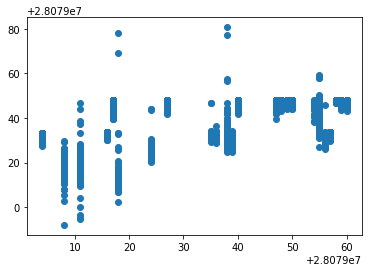

In [13]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [14]:
# Score

print(lr.score(x_test,y_test))

0.3695491571028686


In [15]:
print(lr.score(x_train,y_train))

0.3446404372880941


In [16]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [17]:
#Ridge Score
rr.score(x_test,y_test)

0.3695983421706289

In [18]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [19]:
# Lasso Score
la.score(x_test,y_test)

0.2798031546957839

In [20]:
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [21]:
print(en.coef_)

[ 0.          1.40753865  1.87295781 -0.87456318 -0.023717  ]


In [22]:
print(en.intercept_)

28079023.553037453


In [23]:
print(en.predict(x_test))

[28079047.30404922 28079047.51750222 28079033.50862237 ...
 28079032.72286508 28079042.56064922 28079024.35042051]


In [24]:
print(en.score(x_test,y_test))

0.33244059529896364


In [25]:
# Logistic Regression
fs=StandardScaler().fit_transform(x)

In [26]:
logr=LogisticRegression(max_iter=10000)
logr.fit(fs,y)

LogisticRegression(max_iter=10000)

In [27]:
observation=[[12,28,64,91,73]]
prediction=logr.predict(observation)

In [28]:
print(prediction)

[28079038]


In [29]:
logr.classes_

array([28079004, 28079008, 28079011, 28079016, 28079017, 28079018,
       28079024, 28079027, 28079035, 28079036, 28079038, 28079039,
       28079040, 28079047, 28079048, 28079049, 28079050, 28079054,
       28079055, 28079056, 28079057, 28079058, 28079059, 28079060],
      dtype=int64)

In [30]:
logr.predict_proba(observation)[0][0]

1.5072301500883328e-127

In [31]:
print(logr.score(x_test,y_test))

0.12066666666666667


In [32]:
#Random Forest
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [33]:
parameters={'max_depth':[1,2,3,4,5],
           'min_samples_leaf':[5,6,7,8,9],
           'n_estimators':[12,11,10,5,9]}

In [34]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [5, 6, 7, 8, 9],
                         'n_estimators': [12, 11, 10, 5, 9]},
             scoring='accuracy')

In [35]:
grid_search.best_score_

0.36757142857142855

In [36]:
rfc_best=grid_search.best_estimator_

[Text(1847.6911764705883, 1494.8999999999999, 'X[3] <= 5.37\ngini = 0.958\nsamples = 4423\nvalue = [304, 305, 251, 305, 318, 302, 284, 294, 276, 286\n300, 273, 316, 297, 266, 308, 324, 294, 319, 280\n264, 252, 272, 310]'),
 Text(899.9117647058824, 1223.1, 'X[3] <= 0.115\ngini = 0.666\nsamples = 540\nvalue = [0, 305, 0, 0, 0, 0, 282, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 319, 0, 0, 0, 0, 0]'),
 Text(344.64705882352945, 951.3, 'X[4] <= 1.5\ngini = 0.403\nsamples = 196\nvalue = [0, 66, 0, 0, 0, 0, 233, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 15, 0, 0, 0, 0, 0]'),
 Text(153.1764705882353, 679.4999999999999, 'X[1] <= 0.45\ngini = 0.023\nsamples = 61\nvalue = [0, 0, 0, 0, 0, 0, 84, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 1, 0, 0, 0, 0, 0]'),
 Text(76.58823529411765, 407.6999999999998, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 0, 0, 0, 0, 63, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(229.76470588235296, 407.6999999999998, 'gini = 0.087\nsamples = 18\nvalue = [0, 0, 0, 0, 0, 0, 21, 0, 0, 0, 0, 

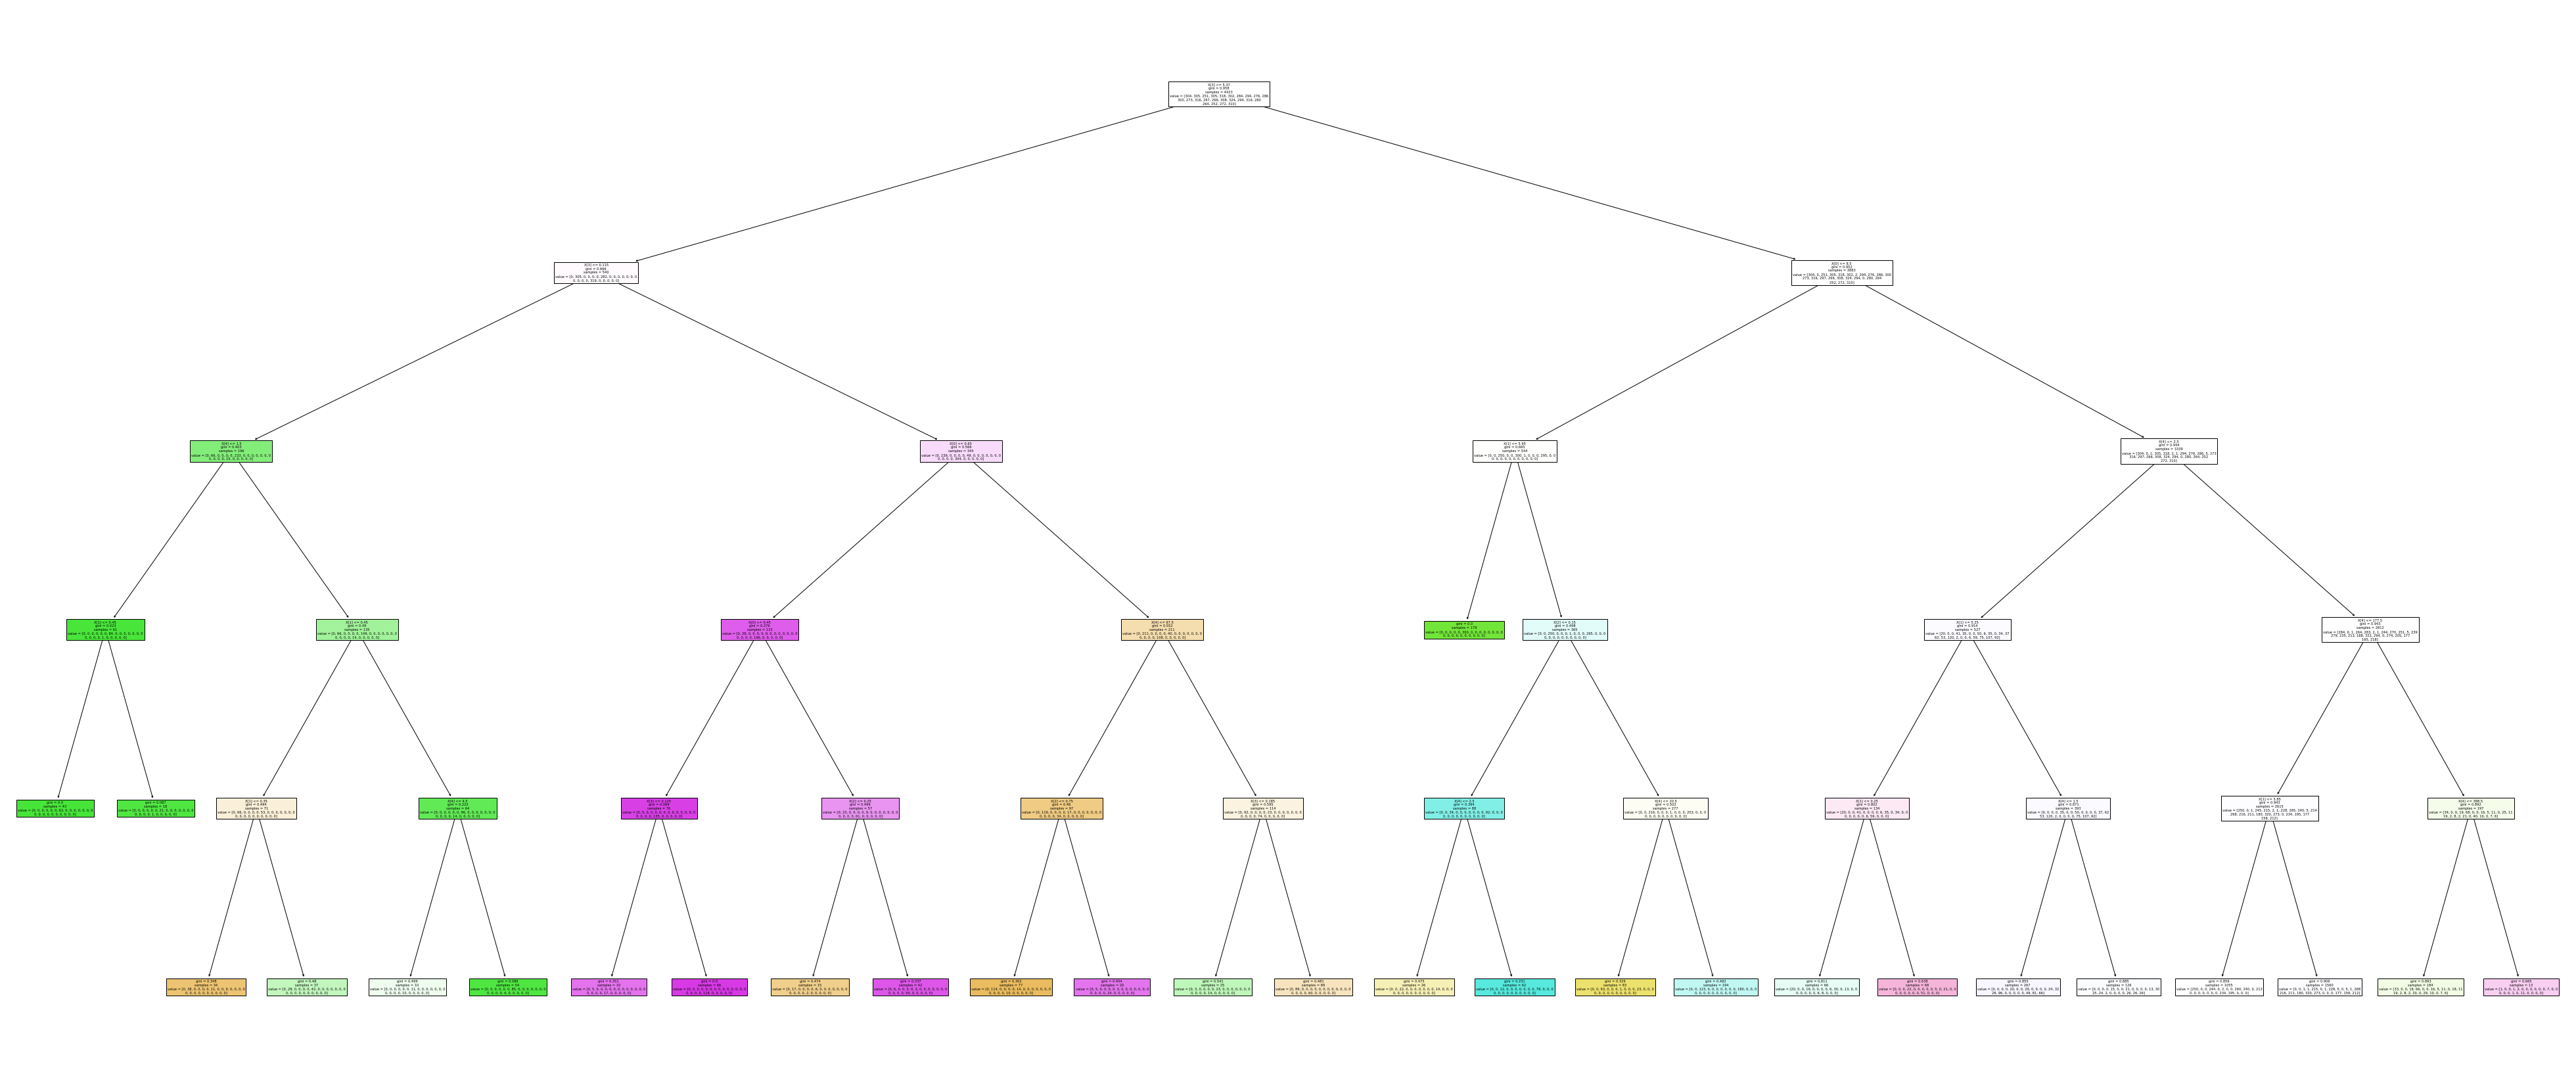

In [37]:
plt.figure(figsize=(70,30))
plot_tree(rfc_best.estimators_[5],filled=True)

Conclusion:RandomForest has Highest accuracy.RandomForest Score=0.3751428571428571

# DataSet 2017

In [38]:
a=pd.read_csv(r"E:\Python Data Science\Documents\csvs_per_year\csvs_per_year\madrid_2017.csv")
a

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2017-06-01 01:00:00,NaN,NaN,0.3,NaN,NaN,4.0,38.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,28079004
1,2017-06-01 01:00:00,0.6,NaN,0.3,0.4,0.08,3.0,39.0,NaN,71.0,22.0,9.0,7.0,1.4,2.9,28079008
2,2017-06-01 01:00:00,0.2,NaN,NaN,0.1,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9,28079011
3,2017-06-01 01:00:00,NaN,NaN,0.2,NaN,NaN,1.0,9.0,NaN,91.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2017-06-01 01:00:00,NaN,NaN,NaN,NaN,NaN,1.0,19.0,NaN,69.0,NaN,NaN,2.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210115,2017-08-01 00:00:00,NaN,NaN,0.2,NaN,NaN,1.0,27.0,NaN,65.0,NaN,NaN,NaN,NaN,NaN,28079056
210116,2017-08-01 00:00:00,NaN,NaN,0.2,NaN,NaN,1.0,14.0,NaN,NaN,73.0,NaN,7.0,NaN,NaN,28079057
210117,2017-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,83.0,NaN,NaN,NaN,NaN,NaN,28079058
210118,2017-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,11.0,NaN,78.0,NaN,NaN,NaN,NaN,NaN,28079059


In [39]:
a=a.head(50000)
a

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2017-06-01 01:00:00,NaN,NaN,0.3,NaN,NaN,4.0,38.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,28079004
1,2017-06-01 01:00:00,0.6,NaN,0.3,0.4,0.08,3.0,39.0,NaN,71.0,22.0,9.0,7.0,1.40,2.9,28079008
2,2017-06-01 01:00:00,0.2,NaN,NaN,0.1,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9,28079011
3,2017-06-01 01:00:00,NaN,NaN,0.2,NaN,NaN,1.0,9.0,NaN,91.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2017-06-01 01:00:00,NaN,NaN,NaN,NaN,NaN,1.0,19.0,NaN,69.0,NaN,NaN,2.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2017-04-27 23:00:00,NaN,NaN,0.2,NaN,NaN,3.0,18.0,NaN,85.0,NaN,NaN,NaN,NaN,NaN,28079016
49996,2017-04-27 23:00:00,NaN,NaN,NaN,NaN,NaN,1.0,22.0,NaN,84.0,NaN,NaN,2.0,NaN,NaN,28079017
49997,2017-04-27 23:00:00,0.2,NaN,0.5,0.1,NaN,2.0,24.0,NaN,85.0,14.0,NaN,8.0,NaN,0.6,28079018
49998,2017-04-27 23:00:00,0.2,NaN,0.2,0.1,0.11,1.0,15.0,NaN,91.0,7.0,4.0,3.0,1.17,0.5,28079024


In [40]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     50000 non-null  object 
 1   BEN      12128 non-null  float64
 2   CH4      0 non-null      float64
 3   CO       20603 non-null  float64
 4   EBE      12130 non-null  float64
 5   NMHC     5929 non-null   float64
 6   NO       49676 non-null  float64
 7   NO_2     49676 non-null  float64
 8   NOx      0 non-null      float64
 9   O_3      28861 non-null  float64
 10  PM10     24690 non-null  float64
 11  PM25     12289 non-null  float64
 12  SO_2     20521 non-null  float64
 13  TCH      5929 non-null   float64
 14  TOL      12111 non-null  float64
 15  station  50000 non-null  int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 6.1+ MB


In [41]:
b=a.fillna(value=30)
b

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2017-06-01 01:00:00,30.0,30.0,0.3,30.0,30.00,4.0,38.0,30.0,30.0,30.0,30.0,5.0,30.00,30.0,28079004
1,2017-06-01 01:00:00,0.6,30.0,0.3,0.4,0.08,3.0,39.0,30.0,71.0,22.0,9.0,7.0,1.40,2.9,28079008
2,2017-06-01 01:00:00,0.2,30.0,30.0,0.1,30.00,1.0,14.0,30.0,30.0,30.0,30.0,30.0,30.00,0.9,28079011
3,2017-06-01 01:00:00,30.0,30.0,0.2,30.0,30.00,1.0,9.0,30.0,91.0,30.0,30.0,30.0,30.00,30.0,28079016
4,2017-06-01 01:00:00,30.0,30.0,30.0,30.0,30.00,1.0,19.0,30.0,69.0,30.0,30.0,2.0,30.00,30.0,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2017-04-27 23:00:00,30.0,30.0,0.2,30.0,30.00,3.0,18.0,30.0,85.0,30.0,30.0,30.0,30.00,30.0,28079016
49996,2017-04-27 23:00:00,30.0,30.0,30.0,30.0,30.00,1.0,22.0,30.0,84.0,30.0,30.0,2.0,30.00,30.0,28079017
49997,2017-04-27 23:00:00,0.2,30.0,0.5,0.1,30.00,2.0,24.0,30.0,85.0,14.0,30.0,8.0,30.00,0.6,28079018
49998,2017-04-27 23:00:00,0.2,30.0,0.2,0.1,0.11,1.0,15.0,30.0,91.0,7.0,4.0,3.0,1.17,0.5,28079024


In [42]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     50000 non-null  object 
 1   BEN      50000 non-null  float64
 2   CH4      50000 non-null  float64
 3   CO       50000 non-null  float64
 4   EBE      50000 non-null  float64
 5   NMHC     50000 non-null  float64
 6   NO       50000 non-null  float64
 7   NO_2     50000 non-null  float64
 8   NOx      50000 non-null  float64
 9   O_3      50000 non-null  float64
 10  PM10     50000 non-null  float64
 11  PM25     50000 non-null  float64
 12  SO_2     50000 non-null  float64
 13  TCH      50000 non-null  float64
 14  TOL      50000 non-null  float64
 15  station  50000 non-null  int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 6.1+ MB


In [43]:
x=b.iloc[:,1:7]
y=b.iloc[:,-1]

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [45]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [46]:
print(lr.intercept_)

28079024.45163791


In [47]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,-3.982767e+00
CH4,-5.950795e-14
CO,4.669604e-01
EBE,4.638538e+00
NMHC,-3.594721e-01
NO,-3.126883e-02


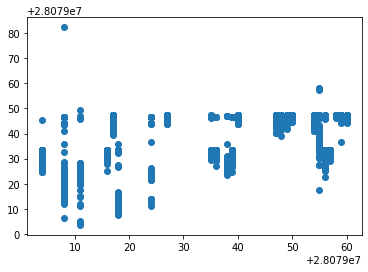

In [48]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [49]:
# Score

print(lr.score(x_test,y_test))

0.31991177741134647


In [50]:
print(lr.score(x_train,y_train))

0.3189116421103012


In [51]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [52]:
#Ridge Score
rr.score(x_test,y_test)

0.31987053421995826

In [53]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [54]:
# Lasso Score
la.score(x_test,y_test)

0.2951973183919696

In [55]:
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [56]:
print(en.coef_)

[ 0.03557802  0.          0.46637635  0.61288824 -0.3309544  -0.03481342]


In [57]:
print(en.intercept_)

28079023.834546257


In [58]:
print(en.predict(x_test))

[28079047.31637939 28079033.41836425 28079047.31637939 ...
 28079037.82633224 28079033.13985685 28079047.17712569]


In [59]:
print(en.score(x_test,y_test))

0.3135238645082098


In [60]:
# Logistic Regression
fs=StandardScaler().fit_transform(x)

In [61]:
logr=LogisticRegression(max_iter=10000)
logr.fit(fs,y)

LogisticRegression(max_iter=10000)

In [62]:
observation=[[54,48,23,64,87,2]]
prediction=logr.predict(observation)

In [63]:
print(prediction)

[28079054]


In [64]:
logr.classes_

array([28079004, 28079008, 28079011, 28079016, 28079017, 28079018,
       28079024, 28079027, 28079035, 28079036, 28079038, 28079039,
       28079040, 28079047, 28079048, 28079049, 28079050, 28079054,
       28079055, 28079056, 28079057, 28079058, 28079059, 28079060],
      dtype=int64)

In [65]:
logr.predict_proba(observation)[0][0]

9.051085484702351e-11

In [66]:
print(logr.score(x_test,y_test))

0.2736


In [67]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [68]:
parameters={'max_depth':[61,34,94,94,39],
           'min_samples_leaf':[1,2,3,37,76],
           'n_estimators':[12,51,54,14,65]}

In [69]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [61, 34, 94, 94, 39],
                         'min_samples_leaf': [1, 2, 3, 37, 76],
                         'n_estimators': [12, 51, 54, 14, 65]},
             scoring='accuracy')

In [70]:
grid_search.best_score_

0.40922857142857144

In [71]:
rfc_best=grid_search.best_estimator_

[Text(1914.6027828054298, 1593.7363636363636, 'X[0] <= 20.0\ngini = 0.958\nsamples = 22062\nvalue = [1438, 1521, 1412, 1477, 1441, 1461, 1437, 1435, 1500\n1477, 1496, 1389, 1462, 1386, 1441, 1496, 1485, 1530\n1507, 1318, 1406, 1538, 1479, 1468]'),
 Text(916.1204864253393, 1519.6090909090908, 'X[4] <= 15.36\ngini = 0.833\nsamples = 5375\nvalue = [0, 1491, 1402, 0, 0, 1444, 1397, 0, 0, 0, 1477\n0, 0, 0, 0, 0, 0, 0, 1390, 0, 0, 0, 0, 0]'),
 Text(330.33095022624434, 1445.4818181818182, 'X[3] <= 0.15\ngini = 0.666\nsamples = 2614\nvalue = [0, 1482, 0, 0, 0, 0, 1378, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 1375, 0, 0, 0, 0, 0]'),
 Text(135.56117647058824, 1371.3545454545454, 'X[4] <= 0.135\ngini = 0.52\nsamples = 1204\nvalue = [0, 217, 0, 0, 0, 0, 1223, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 485, 0, 0, 0, 0, 0]'),
 Text(124.24968325791855, 1297.2272727272727, 'X[4] <= 0.035\ngini = 0.398\nsamples = 857\nvalue = [0, 217, 0, 0, 0, 0, 1027, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 117, 0, 0, 0, 0, 0]'),
 Text(118.5

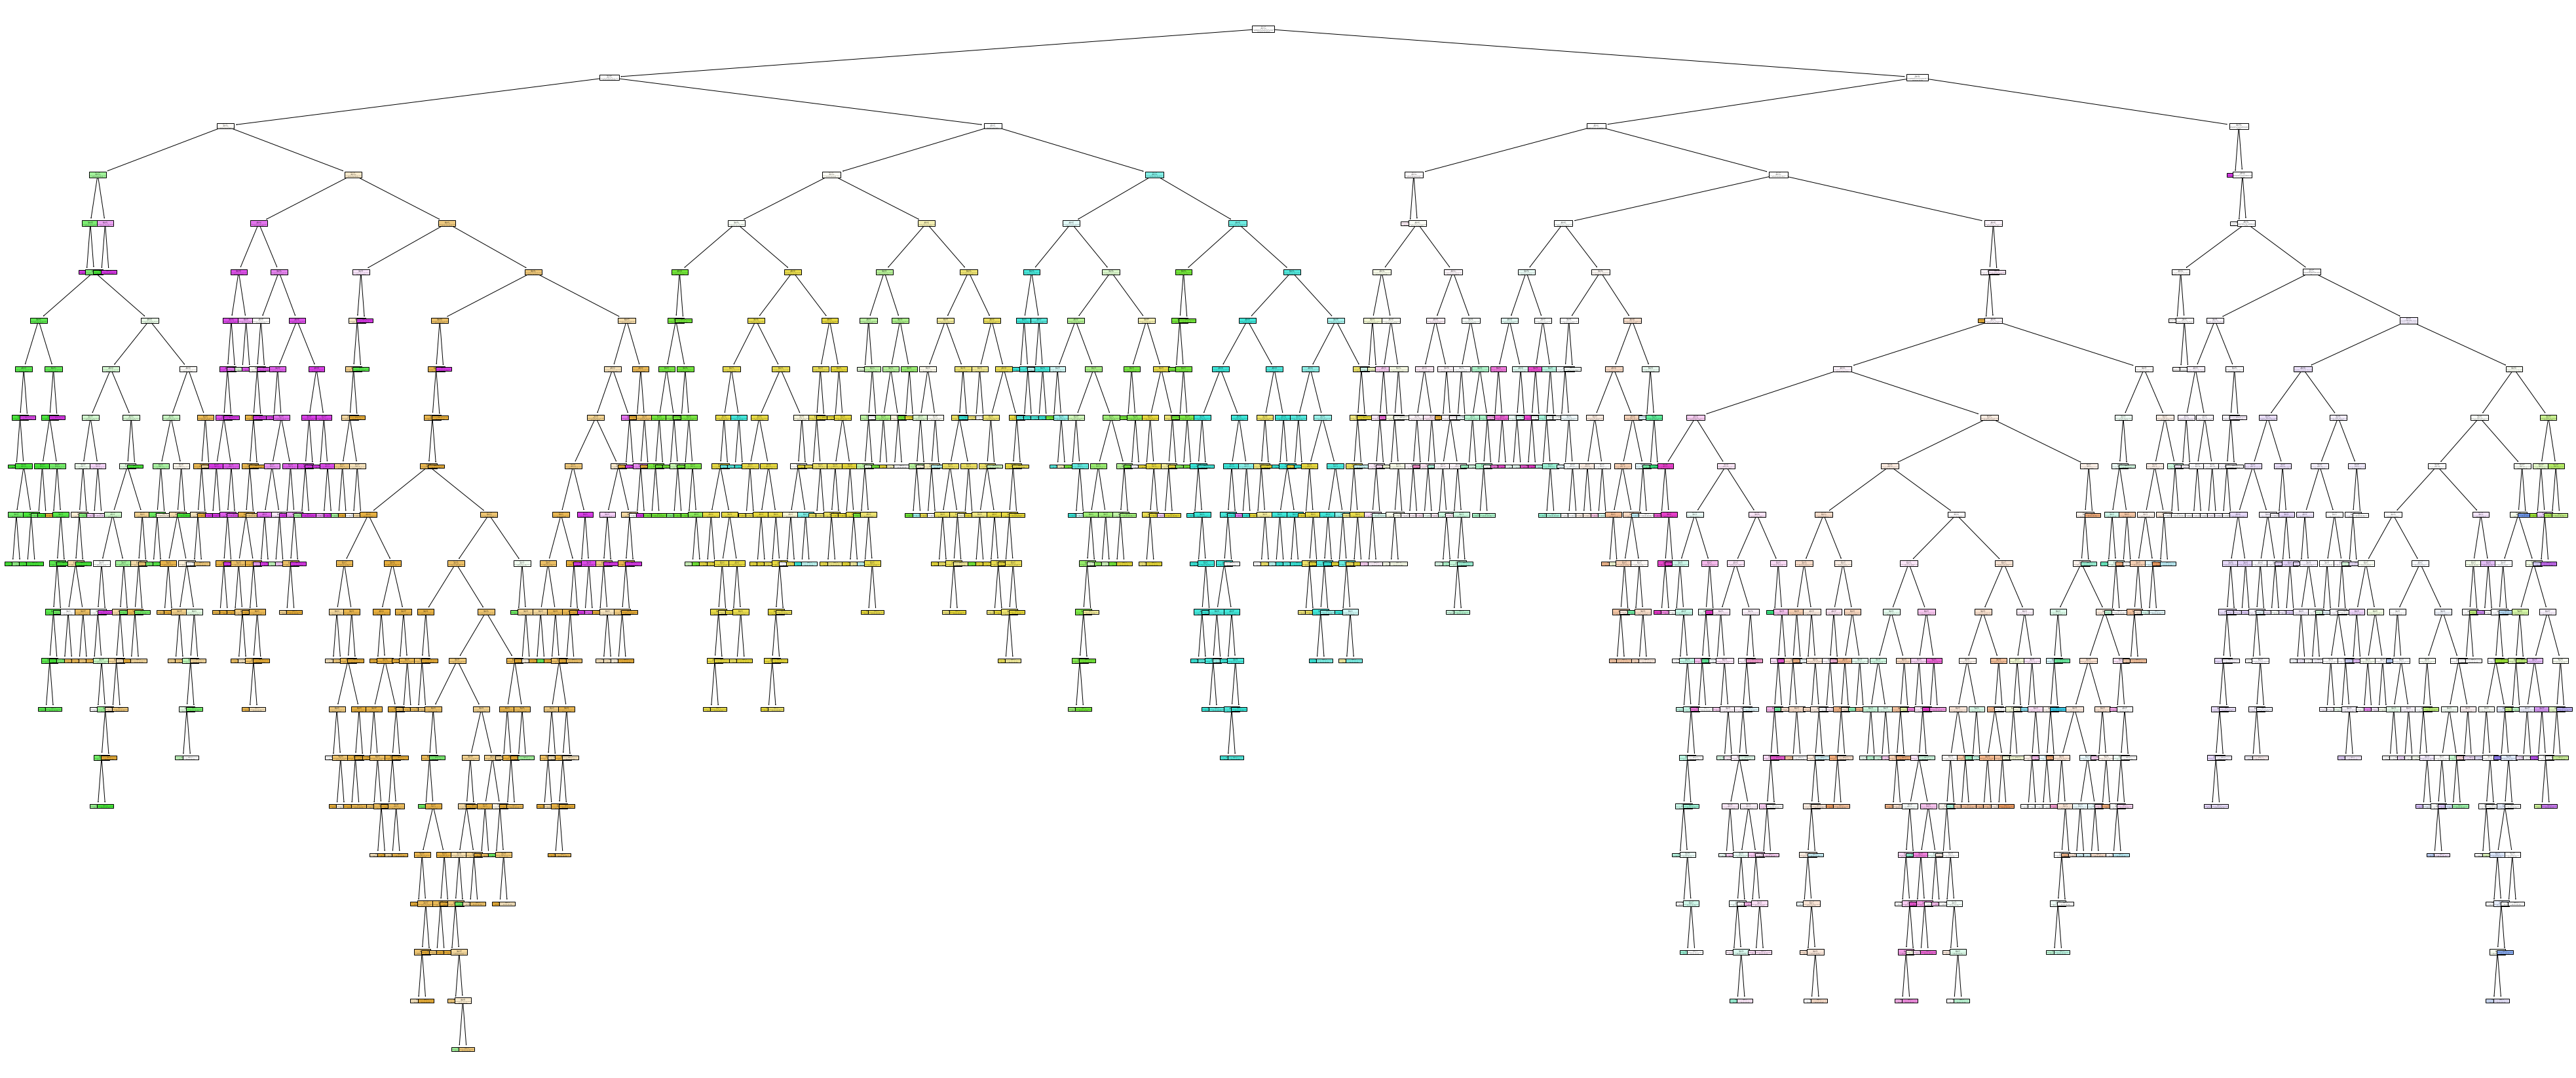

In [72]:
plt.figure(figsize=(70,30))
plot_tree(rfc_best.estimators_[5],filled=True)

As per the score,RandomForest has Highest accuracy.RandomForest Score=0.40900000000000003

# DataSet 2018

In [73]:
a=pd.read_csv(r"E:\Python Data Science\Documents\csvs_per_year\csvs_per_year\madrid_2018.csv")
a=a.head(10000)
a

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2018-03-01 01:00:00,NaN,NaN,0.3,NaN,NaN,1.0,29.0,31.0,NaN,NaN,NaN,2.0,NaN,NaN,28079004
1,2018-03-01 01:00:00,0.5,1.39,0.3,0.2,0.02,6.0,40.0,49.0,52.0,5.0,4.0,3.0,1.41,0.8,28079008
2,2018-03-01 01:00:00,0.4,NaN,NaN,0.2,NaN,4.0,41.0,47.0,NaN,NaN,NaN,NaN,NaN,1.1,28079011
3,2018-03-01 01:00:00,NaN,NaN,0.3,NaN,NaN,1.0,35.0,37.0,54.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2018-03-01 01:00:00,NaN,NaN,NaN,NaN,NaN,1.0,27.0,29.0,49.0,NaN,NaN,3.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2018-03-18 09:00:00,NaN,NaN,0.2,NaN,NaN,3.0,22.0,25.0,65.0,NaN,NaN,NaN,NaN,NaN,28079039
9996,2018-03-18 09:00:00,NaN,NaN,NaN,NaN,NaN,9.0,35.0,49.0,NaN,8.0,NaN,3.0,NaN,NaN,28079040
9997,2018-03-18 09:00:00,NaN,NaN,NaN,NaN,NaN,3.0,25.0,30.0,NaN,5.0,4.0,NaN,NaN,NaN,28079047
9998,2018-03-18 09:00:00,NaN,NaN,NaN,NaN,NaN,2.0,23.0,26.0,NaN,4.0,3.0,NaN,NaN,NaN,28079048


In [74]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     10000 non-null  object 
 1   BEN      2463 non-null   float64
 2   CH4      1241 non-null   float64
 3   CO       4158 non-null   float64
 4   EBE      2463 non-null   float64
 5   NMHC     1241 non-null   float64
 6   NO       9965 non-null   float64
 7   NO_2     9965 non-null   float64
 8   NOx      9965 non-null   float64
 9   O_3      5817 non-null   float64
 10  PM10     5355 non-null   float64
 11  PM25     2869 non-null   float64
 12  SO_2     4160 non-null   float64
 13  TCH      1241 non-null   float64
 14  TOL      2463 non-null   float64
 15  station  10000 non-null  int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 1.2+ MB


In [75]:
b=a.dropna()
b

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
1,2018-03-01 01:00:00,0.5,1.39,0.3,0.2,0.02,6.0,40.0,49.0,52.0,5.0,4.0,3.0,1.41,0.8,28079008
6,2018-03-01 01:00:00,0.4,1.11,0.2,0.1,0.06,1.0,25.0,27.0,55.0,5.0,4.0,4.0,1.16,1.4,28079024
25,2018-03-01 02:00:00,0.4,1.42,0.2,0.1,0.01,4.0,26.0,32.0,64.0,4.0,4.0,3.0,1.44,0.7,28079008
30,2018-03-01 02:00:00,0.3,1.10,0.2,0.1,0.05,1.0,12.0,13.0,69.0,5.0,4.0,4.0,1.14,0.8,28079024
49,2018-03-01 03:00:00,0.3,1.41,0.2,0.1,0.01,3.0,16.0,20.0,68.0,3.0,2.0,3.0,1.42,0.4,28079008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9942,2018-03-18 07:00:00,0.3,1.09,0.2,0.1,0.05,1.0,3.0,5.0,54.0,5.0,4.0,3.0,1.14,0.2,28079024
9961,2018-03-18 08:00:00,0.6,1.42,0.3,0.1,0.06,11.0,42.0,60.0,30.0,3.0,2.0,4.0,1.48,0.9,28079008
9966,2018-03-18 08:00:00,0.3,1.09,0.2,0.1,0.05,1.0,5.0,6.0,51.0,6.0,5.0,3.0,1.14,0.3,28079024
9985,2018-03-18 09:00:00,0.7,1.41,0.3,0.1,0.04,7.0,41.0,52.0,48.0,6.0,3.0,4.0,1.45,0.9,28079008


In [76]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 1 to 9990
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     819 non-null    object 
 1   BEN      819 non-null    float64
 2   CH4      819 non-null    float64
 3   CO       819 non-null    float64
 4   EBE      819 non-null    float64
 5   NMHC     819 non-null    float64
 6   NO       819 non-null    float64
 7   NO_2     819 non-null    float64
 8   NOx      819 non-null    float64
 9   O_3      819 non-null    float64
 10  PM10     819 non-null    float64
 11  PM25     819 non-null    float64
 12  SO_2     819 non-null    float64
 13  TCH      819 non-null    float64
 14  TOL      819 non-null    float64
 15  station  819 non-null    int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 108.8+ KB


In [77]:
x=b.iloc[:,1:5]
y=b.iloc[:,-1]

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [79]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [80]:
print(lr.intercept_)

28079060.56393091


In [81]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,1.998385
CH4,-31.353060
CO,-29.645226
EBE,12.271887


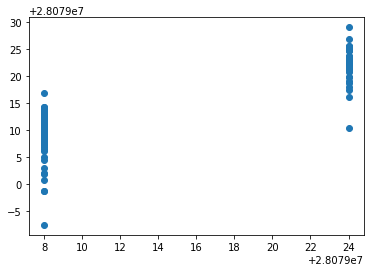

In [82]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [83]:
# Score

print(lr.score(x_test,y_test))

0.8357658914647115


In [84]:
print(lr.score(x_train,y_train))

0.8002068088063325


In [85]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [86]:
#Ridge Score
rr.score(x_test,y_test)

0.7195626632877247

In [87]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [88]:
# Lasso Score
la.score(x_test,y_test)

-0.0008111293598709324

In [89]:
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [90]:
print(en.coef_)

[-1.32075915 -1.47675436 -0.04795268 -0.        ]


In [91]:
print(en.intercept_)

28079018.467797834


In [92]:
print(en.predict(x_test))

[28079016.59916069 28079016.59916069 28079015.32934862 28079016.14386283
 28079016.58439316 28079016.59916069 28079015.18768222 28079015.31458109
 28079015.89198261 28079015.60826796 28079015.09907686 28079016.27593873
 28079015.33932088 28079015.87721508 28079016.60395595 28079016.4375497
 28079015.62303549 28079016.2611712  28079014.73238408 28079015.98972819
 28079014.16955361 28079016.04132194 28079016.00929099 28079016.02405852
 28079014.14021506 28079014.61571123 28079016.45231723 28079015.63032673
 28079015.86244756 28079016.03882605 28079015.74034391 28079015.6222035
 28079016.45231723 28079016.5744209  28079016.32024132 28079016.58439316
 28079015.16607362 28079015.5787329  28079015.17770995 28079016.60395595
 28079015.87721508 28079016.47188003 28079015.31975808 28079015.22514391
 28079015.71080885 28079015.68127379 28079016.45231723 28079015.87971101
 28079016.29070627 28079016.60395595 28079016.09476497 28079014.90876279
 28079016.02655441 28079016.45231723 28079015.7403439

In [93]:
print(en.score(x_test,y_test))

0.10665066107207555


In [94]:
# Logistic Regression
fs=StandardScaler().fit_transform(x)

In [95]:
logr=LogisticRegression(max_iter=10000)
logr.fit(fs,y)

LogisticRegression(max_iter=10000)

In [96]:
observation=[[45,52,45,23]]
prediction=logr.predict(observation)

In [97]:
print(prediction)

[28079008]


In [98]:
logr.classes_

array([28079008, 28079024], dtype=int64)

In [99]:
logr.predict_proba(observation)[0][0]

1.0

In [100]:
print(logr.score(x_test,y_test))

0.491869918699187


In [101]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [102]:
parameters={'max_depth':[54,68,95,34,27],
           'min_samples_leaf':[87,56,84,37,12],
           'n_estimators':[12,70,36,42,56]}

In [103]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [54, 68, 95, 34, 27],
                         'min_samples_leaf': [87, 56, 84, 37, 12],
                         'n_estimators': [12, 70, 36, 42, 56]},
             scoring='accuracy')

In [104]:
grid_search.best_score_

0.994773519163763

In [105]:
rfc_best=grid_search.best_estimator_

[Text(1953.0, 1223.1, 'X[2] <= 0.25\ngini = 0.5\nsamples = 355\nvalue = [293, 280]'),
 Text(976.5, 407.70000000000005, 'gini = 0.274\nsamples = 192\nvalue = [51, 260]'),
 Text(2929.5, 407.70000000000005, 'gini = 0.141\nsamples = 163\nvalue = [242, 20]')]

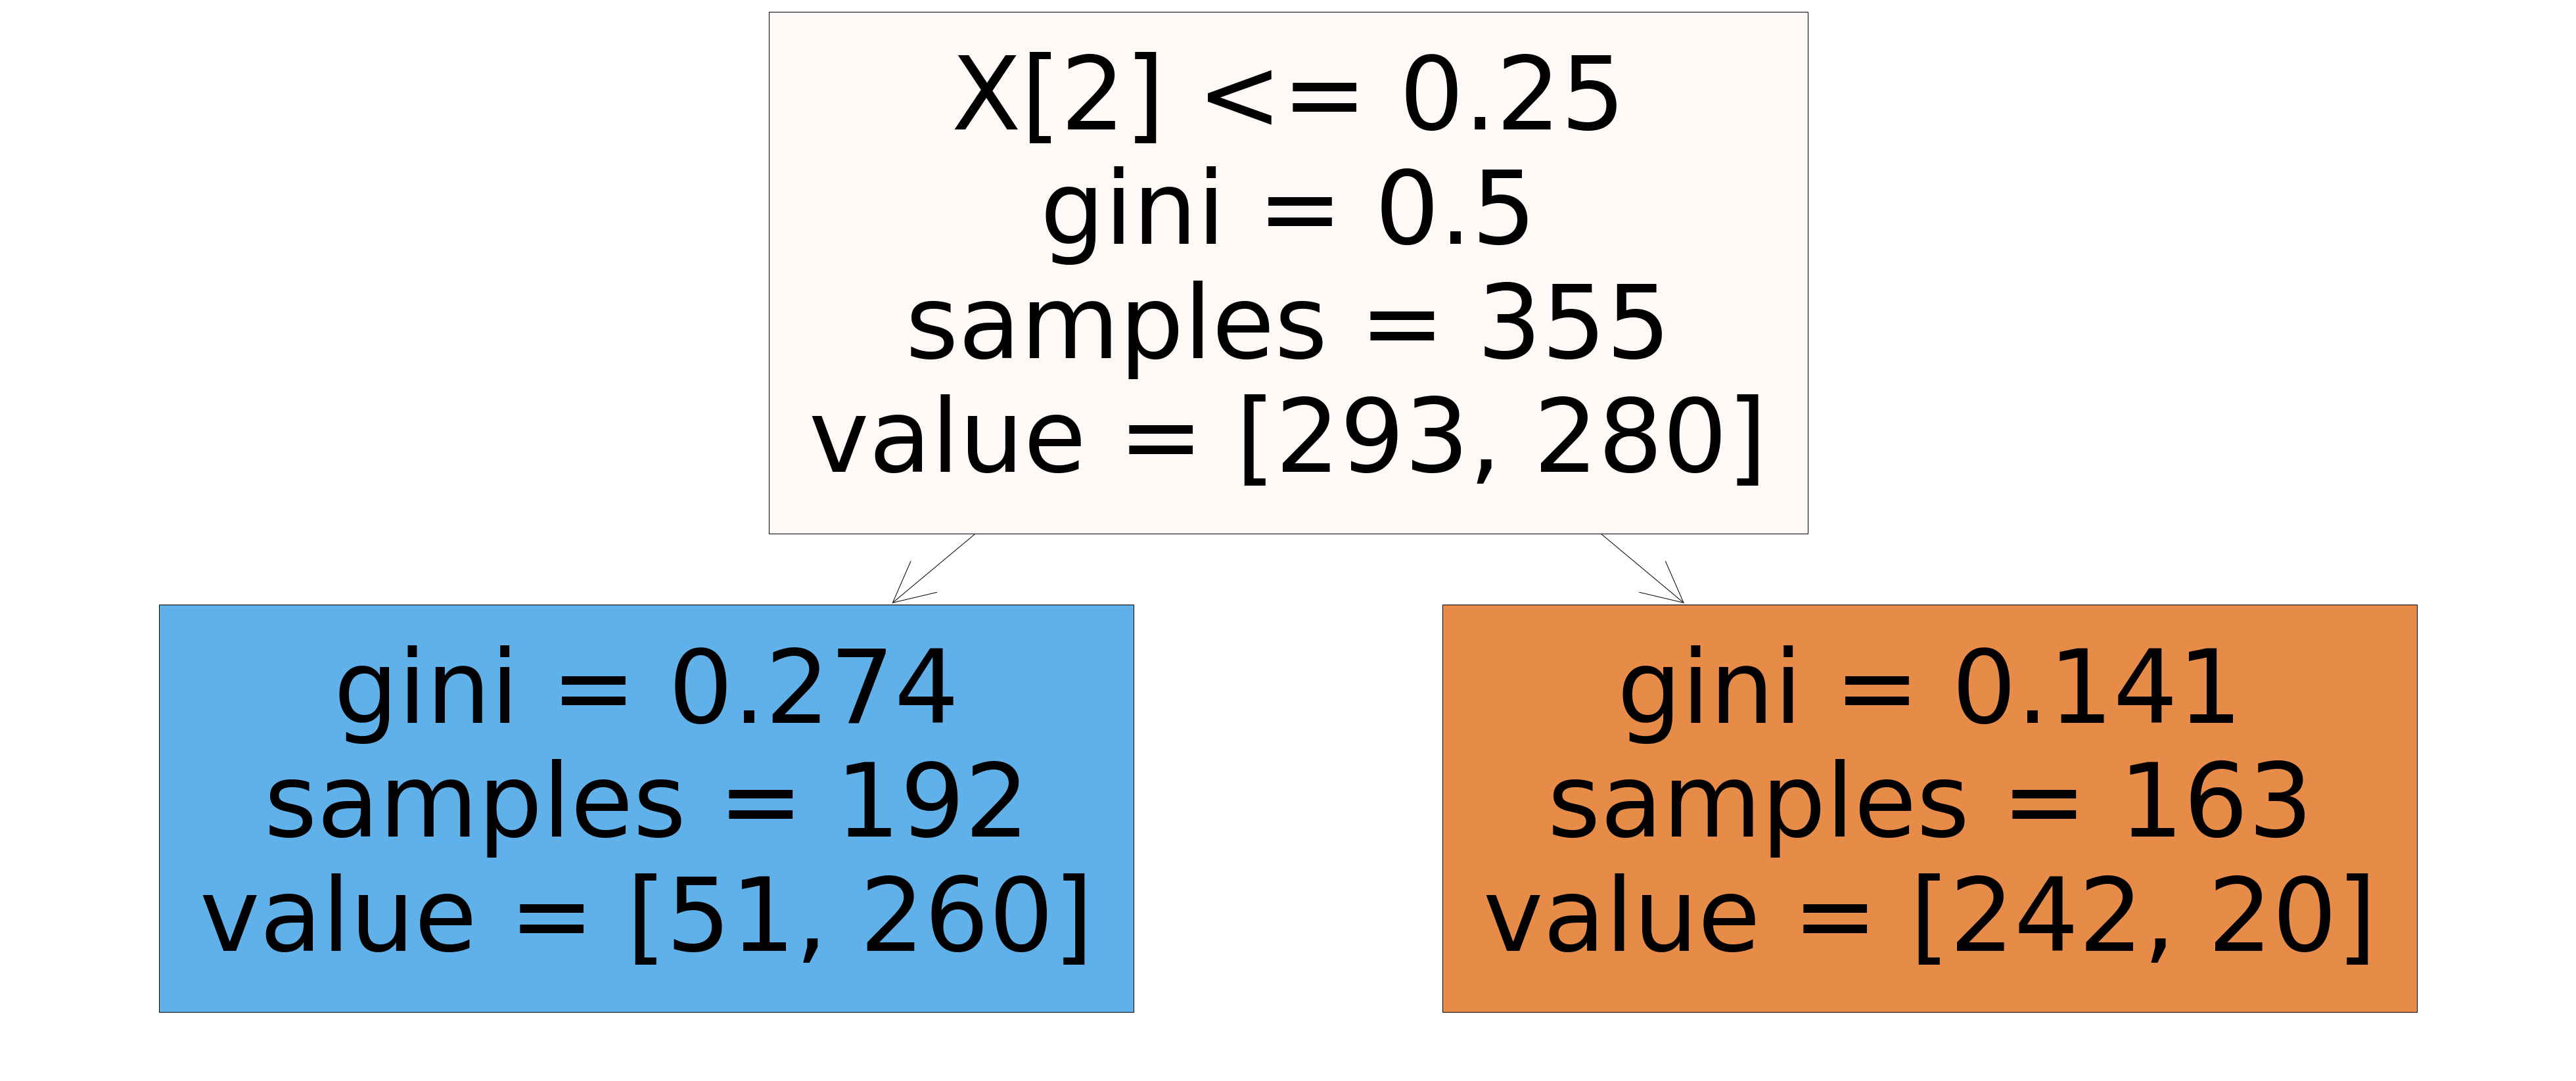

In [106]:
plt.figure(figsize=(70,30))
plot_tree(rfc_best.estimators_[5],filled=True)

Conclusion: RandomForest has highest accuracy.RandomForest Score=0.9965095879730026

# DataSet Stations

In [107]:
a=pd.read_csv(r"E:\Python Data Science\Documents\stations.csv")
a

,id,name,address,lon,lat,elevation
0,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
1,28079008,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,-3.682319,40.421564,670
2,28079011,Avda. Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,-3.677356,40.451475,708
3,28079016,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,-3.639233,40.440047,693
4,28079017,Villaverde,C/. Juan Peñalver,-3.713322,40.347139,604
5,28079018,Farolillo,Calle Farolillo - C/Ervigio,-3.731853,40.394781,630
6,28079024,Casa de Campo,Casa de Campo (Terminal del Teleférico),-3.747347,40.419356,642
7,28079027,Barajas Pueblo,"C/. Júpiter, 21 (Barajas)",-3.580031,40.476928,621
8,28079035,Pza. del Carmen,Plaza del Carmen esq. Tres Cruces.,-3.703172,40.419208,659
9,28079036,Moratalaz,Avd. Moratalaz esq. Camino de los Vinateros,-3.645306,40.407947,685


In [108]:
b=a.dropna()
b

,id,name,address,lon,lat,elevation
0,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
1,28079008,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,-3.682319,40.421564,670
2,28079011,Avda. Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,-3.677356,40.451475,708
3,28079016,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,-3.639233,40.440047,693
4,28079017,Villaverde,C/. Juan Peñalver,-3.713322,40.347139,604
5,28079018,Farolillo,Calle Farolillo - C/Ervigio,-3.731853,40.394781,630
6,28079024,Casa de Campo,Casa de Campo (Terminal del Teleférico),-3.747347,40.419356,642
7,28079027,Barajas Pueblo,"C/. Júpiter, 21 (Barajas)",-3.580031,40.476928,621
8,28079035,Pza. del Carmen,Plaza del Carmen esq. Tres Cruces.,-3.703172,40.419208,659
9,28079036,Moratalaz,Avd. Moratalaz esq. Camino de los Vinateros,-3.645306,40.407947,685


In [109]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         24 non-null     int64  
 1   name       24 non-null     object 
 2   address    24 non-null     object 
 3   lon        24 non-null     float64
 4   lat        24 non-null     float64
 5   elevation  24 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 1.3+ KB


In [110]:
x=b[['id','lon','lat']]
y=b['elevation']

In [220]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [221]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [222]:
print(lr.intercept_)

3156647.034821565


In [223]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
id,-0.113439
lon,-261.486589
lat,700.213622


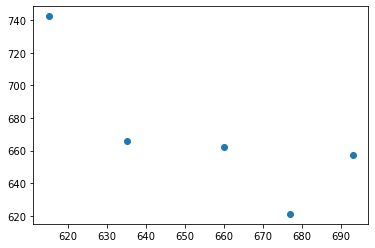

In [224]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [225]:
# Score

print(lr.score(x_test,y_test))

-4.468634918240467


In [226]:
print(lr.score(x_train,y_train))

0.49660871660709693


In [227]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [228]:
#Ridge Score
rr.score(x_test,y_test)

-0.11909301693932184

In [229]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [230]:
# Lasso Score
la.score(x_test,y_test)

-0.09047274405261918

In [231]:
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [232]:
print(en.coef_)

[ 0.19954677 -0.          0.9999906 ]


In [233]:
print(en.intercept_)

-5602462.8718634965


In [234]:
print(en.predict(x_test))

[663.09824501 662.95150608 652.08177587 654.4925314  659.2297599 ]


In [235]:
print(en.score(x_test,y_test))

-0.11432109827336023


In [236]:
# Logistic Regression
fs=StandardScaler().fit_transform(x)

In [237]:
logr=LogisticRegression(max_iter=10000)
logr.fit(fs,y)

LogisticRegression(max_iter=10000)

In [238]:
observation=[[65,72,64]]
prediction=logr.predict(observation)

In [239]:
print(prediction)

[618]


In [240]:
logr.classes_

array([599, 604, 615, 618, 621, 627, 630, 635, 642, 659, 660, 662, 670,
       674, 676, 677, 685, 693, 698, 700, 708, 715, 728], dtype=int64)

In [241]:
logr.predict_proba(observation)[0][0]

1.4585171089690461e-59

In [242]:
print(logr.score(x_test,y_test))

0.2


In [243]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [244]:
parameters={'max_depth':[1,2,3,5,8,9],
           'min_samples_leaf':[6,5,7,9,8],
           'n_estimators':[30,20,50,60,80,100]}

In [245]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 5, 8, 9],
                         'min_samples_leaf': [6, 5, 7, 9, 8],
                         'n_estimators': [30, 20, 50, 60, 80, 100]},
             scoring='accuracy')

In [246]:
grid_search.best_score_

0.10555555555555556

In [247]:
rfc_best=grid_search.best_estimator_

[Text(1953.0, 1223.1, 'X[1] <= -3.699\ngini = 0.886\nsamples = 13\nvalue = [1, 4, 2, 0, 0, 1, 0, 0, 3, 2, 1, 1, 0, 1\n1, 1, 1, 0]'),
 Text(976.5, 407.70000000000005, 'gini = 0.612\nsamples = 5\nvalue = [0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1\n0, 0, 0, 0]'),
 Text(2929.5, 407.70000000000005, 'gini = 0.847\nsamples = 8\nvalue = [1, 0, 2, 0, 0, 0, 0, 0, 3, 2, 0, 1, 0, 0\n1, 1, 1, 0]')]

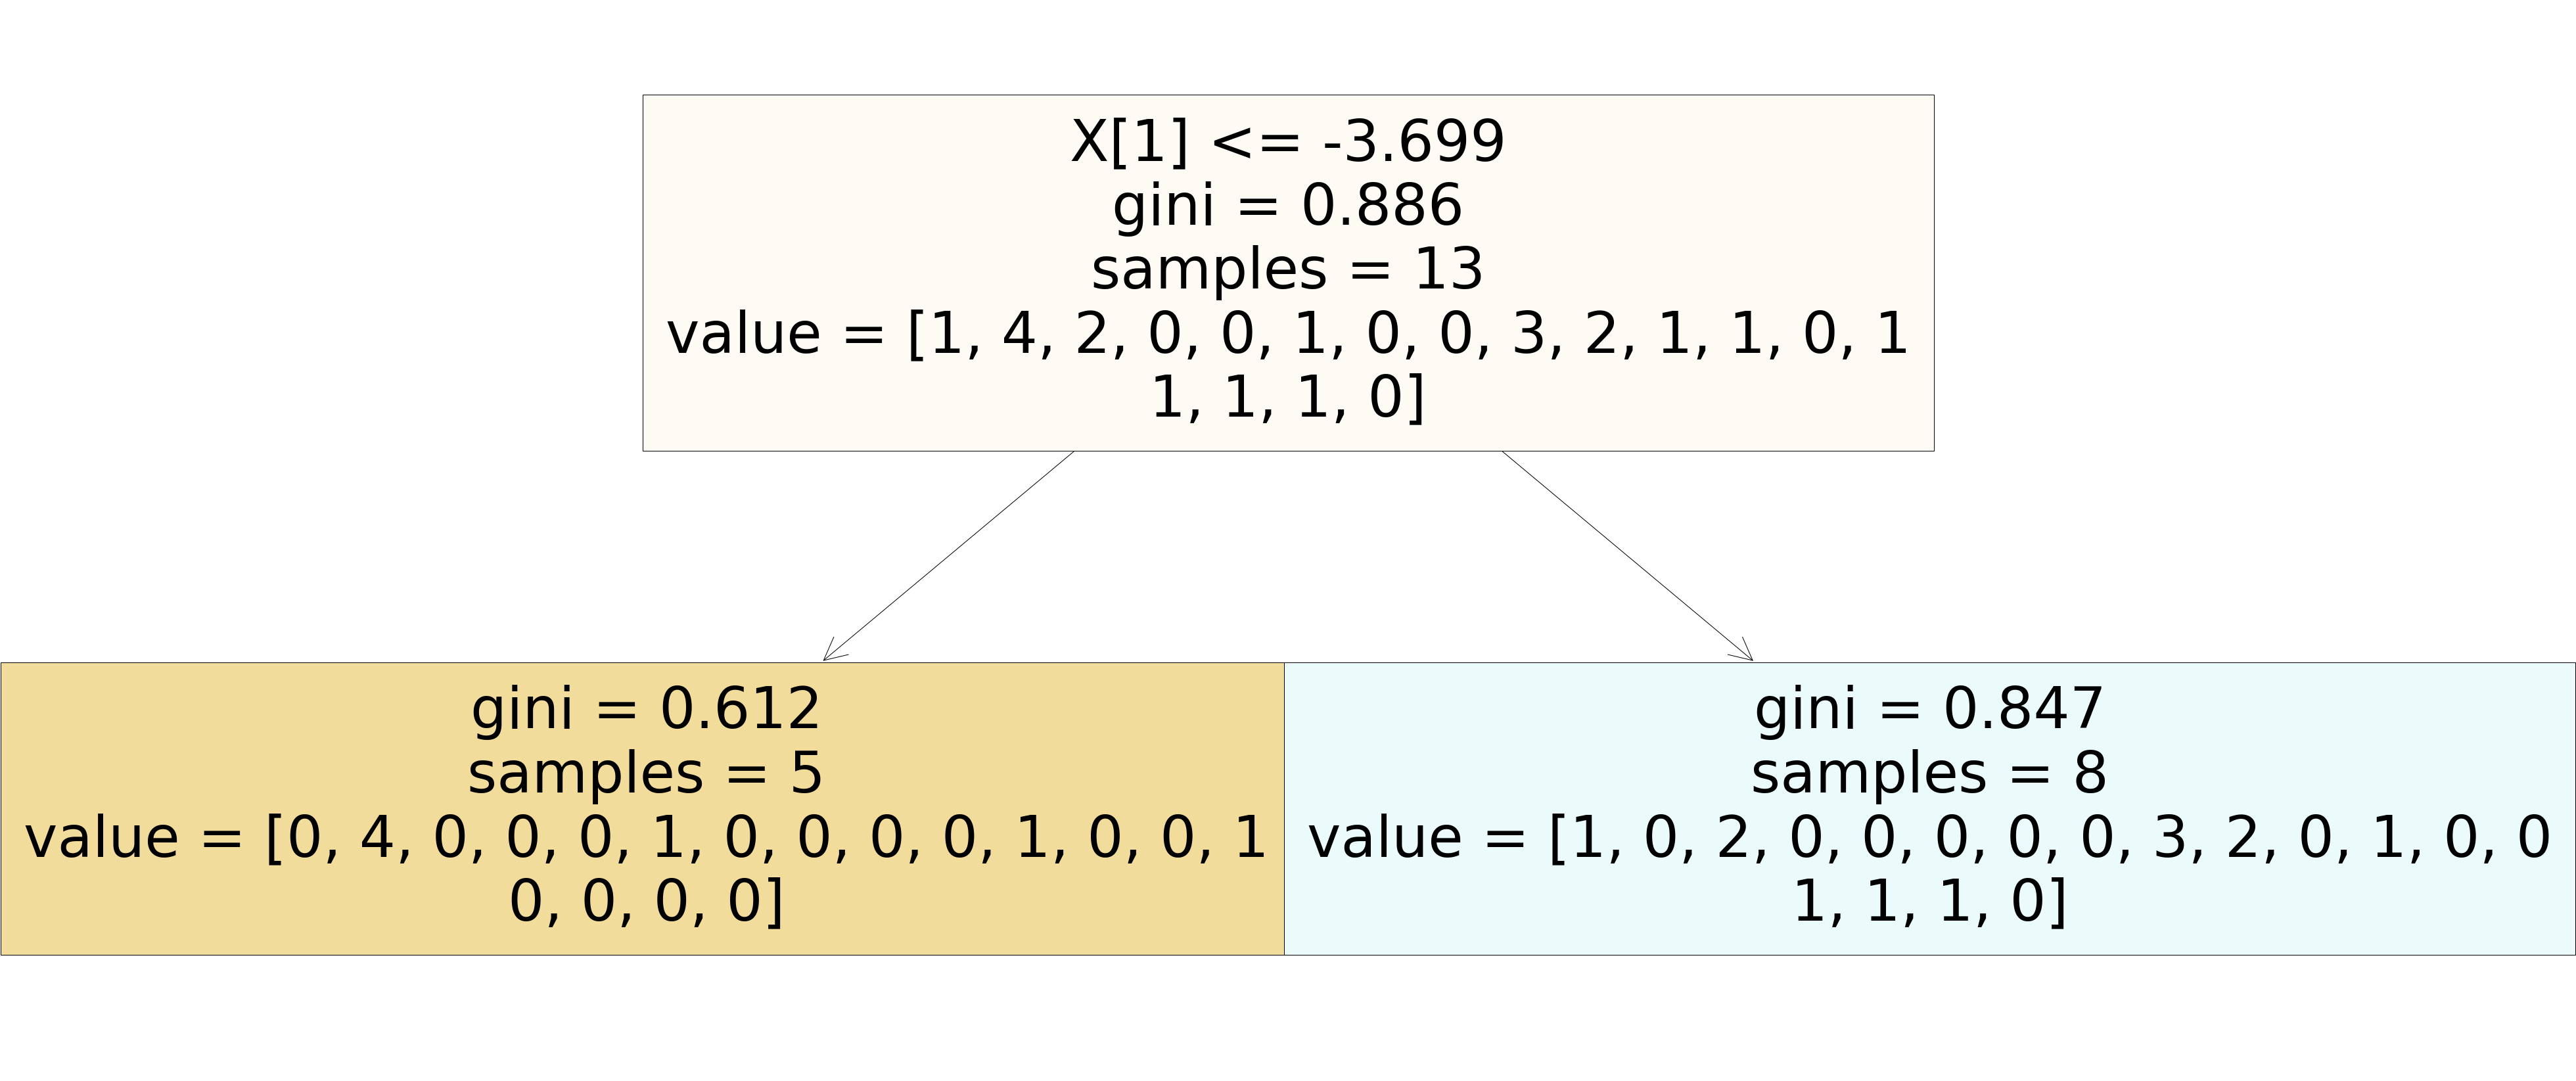

In [248]:
plt.figure(figsize=(70,30))
plot_tree(rfc_best.estimators_[5],filled=True)